In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,NaN,127.0,2.80,NaN,NaN,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,NaN,11.2,100.0,NaN,2.76,0.26,1.28,NaN,1.05,3.40,1050.0
2,NaN,2.36,NaN,18.6,NaN,2.80,NaN,0.30,2.81,5.68,1.03,3.17,NaN
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,NaN,NaN,2.80,2.69,NaN,1.82,4.32,1.04,2.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,NaN,1.68,0.61,0.52,1.06,7.70,NaN,NaN,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,NaN
175,13.27,NaN,2.26,20.0,120.0,1.59,0.69,0.43,1.35,NaN,0.59,1.56,835.0
176,13.17,NaN,2.37,20.0,120.0,NaN,0.68,0.53,1.46,9.30,0.60,1.62,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	31
float64		column 3	23
float64		column 4	30
float64		column 5	37
float64		column 6	35
float64		column 7	38
float64		column 8	36
float64		column 9	42
float64		column 10	38
float64		column 11	33
float64		column 12	44
float64		column 13	41


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,144.000000,147.000000,155.000000,148.000000,141.000000,143.000000,140.000000,142.000000,136.000000,140.000000,145.000000,134.000000,137.000000
mean,13.034236,2.294762,2.358323,19.595946,98.673759,2.294196,2.025500,0.360352,1.567206,5.174357,0.960869,2.567090,754.613139
std,0.832988,1.128862,0.280243,3.300915,12.660680,0.638555,1.020578,0.125474,0.567043,2.307023,0.232997,0.722155,320.892465
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.525000,2.200000,17.175000,88.000000,1.700000,1.090000,0.270000,1.202500,3.300000,0.800000,1.822500,500.000000
50%,13.050000,1.830000,2.350000,19.500000,98.000000,2.400000,2.155000,0.335000,1.480000,5.000000,0.960000,2.725000,675.000000
75%,13.722500,3.030000,2.545000,21.500000,107.000000,2.815000,2.885000,0.430000,1.950000,6.212500,1.120000,3.170000,1020.000000
max,14.830000,5.800000,3.230000,30.000000,136.000000,3.850000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

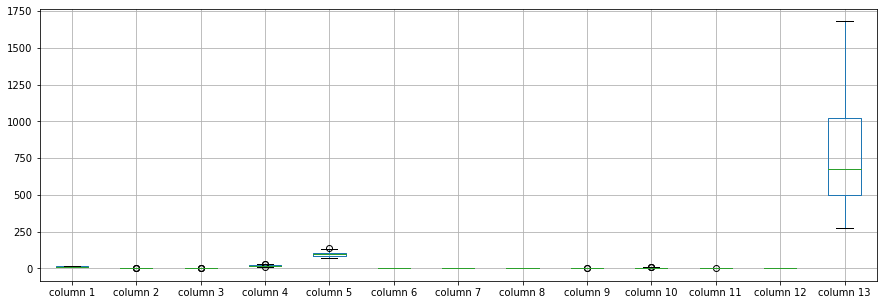

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.034236
column 2       2.294762
column 3       2.358323
column 4      19.595946
column 5      98.673759
column 6       2.294196
column 7       2.025500
column 8       0.360352
column 9       1.567206
column 10      5.174357
column 11      0.960869
column 12      2.567090
column 13    754.613139
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.053384,0.243178,-0.234854,0.298448,0.268590,0.182756,-0.071727,0.192246,0.587157,-0.044549,0.098324,0.652152
column 2,0.053384,1.000000,0.185718,0.295049,0.013893,-0.263081,-0.354341,0.199894,-0.103634,0.117696,-0.496045,-0.338197,-0.156560
column 3,0.243178,0.185718,1.000000,0.395020,0.342314,0.199029,0.179806,0.131327,0.040072,0.277769,-0.000955,-0.004557,0.251889
column 4,-0.234854,0.295049,0.395020,1.000000,-0.128490,-0.314698,-0.430512,0.316422,-0.155776,0.026609,-0.221562,-0.296143,-0.420278
column 5,0.298448,0.013893,0.342314,-0.128490,1.000000,0.216323,0.191570,-0.242709,0.166327,0.258518,-0.016440,0.097205,0.465961
column 6,0.268590,-0.263081,0.199029,-0.314698,0.216323,1.000000,0.879519,-0.458608,0.663195,-0.042656,0.436000,0.717427,0.518598
column 7,0.182756,-0.354341,0.179806,-0.430512,0.191570,0.879519,1.000000,-0.525048,0.656869,-0.212752,0.536746,0.786459,0.530873
column 8,-0.071727,0.199894,0.131327,0.316422,-0.242709,-0.458608,-0.525048,1.000000,-0.443586,0.220828,-0.328762,-0.563347,-0.264375
column 9,0.192246,-0.103634,0.040072,-0.155776,0.166327,0.663195,0.656869,-0.443586,1.000000,0.006904,0.281085,0.521718,0.372102
column 10,0.587157,0.117696,0.277769,0.026609,0.258518,-0.042656,-0.212752,0.220828,0.006904,1.000000,-0.551174,-0.379757,0.310786


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+33,13+33+33,13+33+33,13+33+33+33+33,13+33+33+33+33+33,13+33+33+33+33+33+33,13+33+33+33+33+33,13+33+33+33+33,13+33+33+33,13+33+33,13+33,13], vae_layer = False, seed = 330)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 755.384072043679
Epoch: 1 , loss: 748.926025390625
Epoch: 2 , loss: 749.801103071733
Epoch: 3 , loss: 742.0401222922585
Epoch: 4 , loss: 753.5571122602983
Epoch: 5 , loss: 749.3345780806108
Epoch: 6 , loss: 742.0277876420455
Epoch: 7 , loss: 745.2930020419034
Epoch: 8 , loss: 747.3144753196023
Epoch: 9 , loss: 753.8640358664773
Epoch: 10 , loss: 746.6705433238636
Epoch: 11 , loss: 747.4359130859375
Epoch: 12 , loss: 746.2480968128551
Epoch: 13 , loss: 751.2047230113636
Epoch: 14 , loss: 743.3025457208806
Epoch: 15 , loss: 752.1270696466619
Epoch: 16 , loss: 746.9921042702415
Epoch: 17 , loss: 747.8993308327415
Epoch: 18 , loss: 740.6997320001775
Epoch: 19 , loss: 751.6794544566761
Epoch: 20 , loss: 752.594893022017
Epoch: 21 , loss: 753.2839577414773
Epoch: 22 , loss: 749.4702481356534
Epoch: 23 , loss: 751.8638028231534
Epoch: 24 , loss: 747.925947709517
Epoch: 25 , loss: 747.416054465554
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.160431
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.432782
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      3.520000
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,2.955508,0.000000,0.000000,-0.838205,0.114642,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,2.164197,0.000000,0.000000,1.863376,0.000000,0.000000,0.0,5.111873,0.000000,0.000000,0.000000
2,-12.472942,0.000000,-2.251237,0.000000,-93.733285,0.000000,-2.872299,0.000000,0.0,0.000000,0.000000,0.000000,-1141.044270
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-18.601619,-108.646083,0.000000,0.000000,-0.281381,0.0,0.000000,0.000000,0.000000,-678.284874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.000000,0.000000,-7.511757,0.000000,0.000000,0.000000,0.0,0.000000,0.580845,-0.062728,0.000000
174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-386.334106
175,0.000000,-3.872374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-9.354465,0.000000,0.000000,0.000000
176,0.000000,-2.249117,0.000000,0.000000,0.000000,-0.968183,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-724.473274


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4104.713447588158, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3766456283144433

In [18]:
new_df.iloc[66,:]

column 1       1.579849
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.430000,18.555508,127.000000,2.800000,2.221795,0.394642,2.29,5.640000,1.040000,3.920000,1065.000000
1,13.200000,1.780000,4.304197,11.200000,100.000000,4.513376,2.760000,0.260000,1.28,9.491873,1.050000,3.400000,1050.000000
2,0.687058,2.360000,0.418763,18.600000,7.266715,2.800000,0.367701,0.300000,2.81,5.680000,1.030000,3.170000,43.955730
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.18,7.800000,0.860000,3.450000,1480.000000
4,13.240000,2.590000,2.870000,2.398381,9.353917,2.800000,2.690000,0.108619,1.82,4.320000,1.040000,2.930000,56.715126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.450000,20.500000,87.488243,1.680000,0.610000,0.520000,1.06,7.700000,1.220845,1.677272,740.000000
174,13.400000,3.910000,2.480000,23.000000,102.000000,1.800000,0.750000,0.430000,1.41,7.300000,0.700000,1.560000,363.665894
175,13.270000,0.407626,2.260000,20.000000,120.000000,1.590000,0.690000,0.430000,1.35,0.845535,0.590000,1.560000,835.000000
176,13.170000,0.340883,2.370000,20.000000,120.000000,0.681817,0.680000,0.530000,1.46,9.300000,0.600000,1.620000,115.526726


In [20]:
imputations[-1].to_excel("Wine_C_20(imp).xlsx", index=False, header=False)